# User-Generated Content Analysis - Malta

This is an analysis of User-Generated Content on Sustainable Fashion from Instagram. 


**Research Hypothesis**:
User-Generated Content is effective in Sustainable Fashion to increase consumer attraction and engagement.

**Research Questions**:
1. How can UGC foster C2C relationships within the sustainability community?
2. How effective is current UGC in Sustainable Fashion when measured using quantitative analysis techniques?
3. Which guidelines should be followed to create effective UGC in Sustainable Fashion?

## Data Acquisition

In [514]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.api as sm

In [515]:
# Import filtered csv file

df = pd.read_csv("filtered_data.csv")

In [516]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3351 non-null   int64  
 1   ownerUsername                       3351 non-null   object 
 2   timestamp                           3219 non-null   object 
 3   locationName                        1503 non-null   object 
 4   caption                             3351 non-null   object 
 5   type                                3351 non-null   object 
 6   likesCount                          3351 non-null   float64
 7   commentsCount                       3351 non-null   float64
 8   videoViewCount                      1386 non-null   float64
 9   videoPlayCount                      1386 non-null   float64
 10  videoDuration                       1386 non-null   float64
 11  videoUrl                            1386 no

In [517]:
# Preview data start
df.head()

,id,ownerUsername,timestamp,locationName,caption,type,likesCount,commentsCount,videoViewCount,videoPlayCount,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,user_followersCount
0,3522923886333240203,user1,2024-12-14T14:07:55.000Z,Malta,🐟 \n\n.\n.\n.\n.\n.\n.\n.\n\n#fallstyle #outfi...,Sidecar,-1.0,114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,3515616726511352970,user1,2024-12-04T12:09:54.000Z,"Valletta, Malta","🌞\n\n.\n.\n.\n.\n.\n.\n.\n.\n\nFall outfit, th...",Sidecar,-1.0,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,3504077318599620013,user1,2024-11-18T14:03:09.000Z,"Naples, Italy",🖼️\n\n.\n.\n.\n.\n.\n.\n.\n.\n\nThrifted fashi...,Sidecar,-1.0,127.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,3500422427586962100,user1,2024-11-13T13:01:32.000Z,"Naples, Italy","🦂\n\n.\n.\n.\n.\n.\n.\n\nNight out style, even...",Sidecar,-1.0,169.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,3502520894870331632,user1,2024-11-16T10:30:49.000Z,"Sorrento, Italy",☮️🫂🌞 the most beautiful day \n\n.\n.\n.\n.\n.\...,Sidecar,-1.0,159.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [518]:
# Preview data end
df.tail()

,id,ownerUsername,timestamp,locationName,caption,type,likesCount,commentsCount,videoViewCount,videoPlayCount,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,user_followersCount
3346,3139613494894167161,user49,2023-07-04T17:18:35.000Z,"Paris, France",Espresso makes me less depresso\n\n.\n.\n.\n#s...,Sidecar,1956.0,84.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82034
3347,3127282685445296183,user49,2023-06-17T16:59:28.000Z,Louis Vuitton Foundation,Basquiat babe\n.\n.\n\n.\n#streetweargirls #st...,Sidecar,5956.0,112.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82034
3348,3113536896864562414,user49,2023-05-29T17:49:03.000Z,"Paris, France",Swipe to the last pic to see me as a Sim. Code...,Sidecar,3197.0,113.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82034
3349,3141785194750651642,user49,2023-07-07T17:13:22.000Z,"Paris, France",Find yourself someone who looks at you the way...,Sidecar,7353.0,117.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82034
3350,3111406786954765949,user49,2023-05-26T19:16:54.000Z,"Paris, France",I prefer my grapes in a glass thank you very m...,Sidecar,6494.0,103.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82034


In [519]:
df.isnull().sum()

id                                       0
ownerUsername                            0
timestamp                              132
locationName                          1848
caption                                  0
type                                     0
likesCount                               0
commentsCount                            0
videoViewCount                        1965
videoPlayCount                        1965
videoDuration                         1965
videoUrl                              1965
musicInfo/artist_name                 2045
musicInfo/audio_id                    1990
musicInfo/should_mute_audio           1990
musicInfo/should_mute_audio_reason    3295
musicInfo/song_name                   2045
musicInfo/uses_original_audio         1990
isSponsored                              0
isPinned                              3332
hashtags/0                             229
hashtags/1                             288
hashtags/2                             322
hashtags/3 

## Data Preprocessing and Exploration

In [520]:
df.describe()

,id,likesCount,commentsCount,videoViewCount,videoPlayCount,videoDuration,musicInfo/audio_id,user_followersCount
count,3.351000e+03,3351.000000,3351.000000,1.386000e+03,1.386000e+03,1386.000000,1.361000e+03,3351.000000
mean,3.368786e+18,1211.260818,37.947180,2.019569e+04,6.060258e+04,22.188371,1.135999e+15,38809.672337
std,1.586709e+17,8640.327863,71.611818,9.887621e+04,2.692166e+05,54.419273,1.372174e+15,71681.060554
min,2.594320e+18,-1.000000,0.000000,8.400000e+01,1.960000e+02,2.111000,0.000000e+00,0.000000
25%,3.286679e+18,-1.000000,7.000000,1.032500e+03,3.258250e+03,7.933000,4.142240e+14,5019.000000
50%,3.412803e+18,146.000000,20.000000,2.652500e+03,8.641500e+03,12.876000,8.747921e+14,10062.000000
75%,3.485124e+18,393.000000,48.000000,7.819750e+03,2.498925e+04,23.791500,1.436297e+15,20018.000000
max,3.578883e+18,298423.000000,3031.000000,1.783210e+06,4.532511e+06,1847.379000,2.548291e+16,344696.000000


In [521]:
df[['likesCount', 'commentsCount', 'user_followersCount', 'videoViewCount']].describe()

,likesCount,commentsCount,user_followersCount,videoViewCount
count,3351.000000,3351.000000,3351.000000,1.386000e+03
mean,1211.260818,37.947180,38809.672337,2.019569e+04
std,8640.327863,71.611818,71681.060554,9.887621e+04
min,-1.000000,0.000000,0.000000,8.400000e+01
25%,-1.000000,7.000000,5019.000000,1.032500e+03
50%,146.000000,20.000000,10062.000000,2.652500e+03
75%,393.000000,48.000000,20018.000000,7.819750e+03
max,298423.000000,3031.000000,344696.000000,1.783210e+06


In [522]:
# Filter hashtag columns
hashtag_cols = [col for col in df.columns if col.startswith('hashtags/')]

# Combine all hashtags into a single string per row
hashtags = df[hashtag_cols].fillna('').astype(str).agg(' '.join, axis=1)

# add column in df
df['hashtags'] = hashtags

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3351 non-null   int64  
 1   ownerUsername                       3351 non-null   object 
 2   timestamp                           3219 non-null   object 
 3   locationName                        1503 non-null   object 
 4   caption                             3351 non-null   object 
 5   type                                3351 non-null   object 
 6   likesCount                          3351 non-null   float64
 7   commentsCount                       3351 non-null   float64
 8   videoViewCount                      1386 non-null   float64
 9   videoPlayCount                      1386 non-null   float64
 10  videoDuration                       1386 non-null   float64
 11  videoUrl                            1386 no

In [523]:
# Calculate Hashtags Count [From Sun et al. the average is 12 hashtags]
# Identify all the hashtag columns
hashtag_columns = [col for col in df.columns if col.startswith("hashtags/")]

# Count non-null hashtags per row
df['hashtagsCount'] = df[hashtag_columns].notna().sum(axis=1)

In [524]:
# Caption word count
df['captionWordCount'] = df['caption'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [525]:
df['isSponsored'].unique()

array([False])

In [526]:
# Check if isSponsored or contain words
is_sponsored = (df['isSponsored'] == True) | (df['caption'].str.contains(r'\b(ad|sponsored|collab|PR)\b', case=False, na=False)) # Use regex for word boundary)

# Convert isSponsored to numeric (one-hot encoding)
df['isSponsored_encoded'] = is_sponsored.astype(int)

# check the number of rows after filtering
number_sponsored = is_sponsored.sum()
print("Number of posts identified as sponsored:", number_sponsored)

Number of posts identified as sponsored: 122


C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\4210770493.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  is_sponsored = (df['isSponsored'] == True) | (df['caption'].str.contains(r'\b(ad|sponsored|collab|PR)\b', case=False, na=False)) # Use regex for word boundary)


All post in the dataset is not sponsored, after analysisng through relevant keywords on the caption 122 posts contained at least one of the words: ad|sponsored|collab|PR

In [527]:
# Convert type to numeric (one-hot encoding)
df['type_encoded'] = df['type'].astype('category').cat.codes

In [528]:
# Convert song_name that is not null to numeric (one-hot encoding)
df['has_music'] = df['musicInfo/song_name'].notnull().astype(int)

In [529]:
# Uses original audio
df['original_audio'] = df['musicInfo/uses_original_audio'].astype(str).str.lower().map({'true': 1, 'false': 0})
df['original_audio'] = df['original_audio'].fillna(0).astype(int) #No

In [530]:
print(df.columns)

Index(['id', 'ownerUsername', 'timestamp', 'locationName', 'caption', 'type',
       'likesCount', 'commentsCount', 'videoViewCount', 'videoPlayCount',
       'videoDuration', 'videoUrl', 'musicInfo/artist_name',
       'musicInfo/audio_id', 'musicInfo/should_mute_audio',
       'musicInfo/should_mute_audio_reason', 'musicInfo/song_name',
       'musicInfo/uses_original_audio', 'isSponsored', 'isPinned',
       'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4',
       'hashtags/5', 'hashtags/6', 'hashtags/7', 'hashtags/8', 'hashtags/9',
       'hashtags/10', 'hashtags/11', 'hashtags/12', 'hashtags/13',
       'hashtags/14', 'hashtags/15', 'hashtags/16', 'hashtags/17',
       'hashtags/18', 'hashtags/19', 'hashtags/20', 'hashtags/21',
       'hashtags/22', 'hashtags/23', 'hashtags/24', 'hashtags/25',
       'hashtags/26', 'hashtags/27', 'hashtags/28', 'hashtags/29',
       'user_followersCount', 'hashtags', 'hashtagsCount', 'captionWordCount',
       'isSponsored_enco

In [531]:
df_era = df[(df['likesCount'] > 0) & (df['user_followersCount'] > 0)]

# check the number of rows after filtering
print('Number of relevant posts: ', len(df_era))

Number of relevant posts:  2456


To calculate engagement rate, engagement metrics and Community size or Impressions are needed. In our data, we only have likes and comments for the engagement metrics, for the latter we can use the profile's follower count or the videoViewCount for the impression, but of course this is only available in Reels / Video format, thus we proceed with the former instead.

We can also explore and assess relationships between variables individually (e.g. check the averages of likes, comments, followers, views).

likesCount has the value -1 because the post has the number of likes hidden.
Therefore these shall be excluded as well

Some posts are collaborations which means it has multiple posters, or the original poster is not the one that was scraped from therefore the follower count results to 0. These shall be excluded as well.

### Engagement Rate 

formula to calculate engagement rate [Cuevas-Molano et al.; Ryahen]:

**(likes + comments) / followers **


In [532]:
# Calculate Engagement Rate (ER) and add column to the df
df_era['engagement_rate'] = (df_era['likesCount'] + df_era['commentsCount']) / df_era['user_followersCount'].replace(0, 1)


C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\4168577129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_era['engagement_rate'] = (df_era['likesCount'] + df_era['commentsCount']) / df_era['user_followersCount'].replace(0, 1)


In [533]:
# Engagement Rate by Content Type
avg_er_by_type = df_era.groupby('type')['engagement_rate'].mean()

print("Average engagement rate by content type:", avg_er_by_type)

Average engagement rate by content type: type
Image      0.027697
Sidecar    0.039270
Video      0.068027
Name: engagement_rate, dtype: float64


Unlike  the Maltese dataset this one has the Image format and we can copare all content types.

C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\3056151197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_type.index, y=avg_er_by_type.values, palette="viridis")


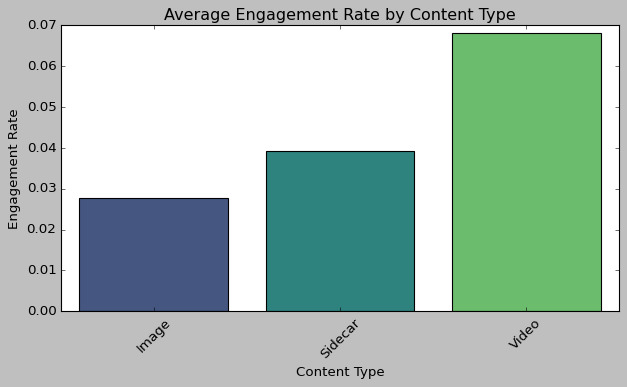

In [534]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_er_by_type.index, y=avg_er_by_type.values, palette="viridis")
plt.title('Average Engagement Rate by Content Type')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\3923913778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_era, x='type', y='engagement_rate', palette='viridis')


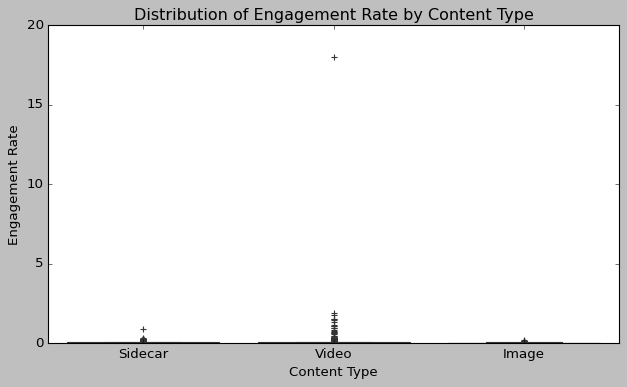

In [535]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_era, x='type', y='engagement_rate', palette='viridis')
plt.title('Distribution of Engagement Rate by Content Type')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.tight_layout()
plt.show()

As we can see there are outliers in the data with especially in videos having a higher engagement rate. We would like to see the engagement rate from the top posts, this is identified by choosing those higher than the average [Ryahen,2019].

In [536]:
df_era['log_engagement_rate'] = np.log1p(df_era['engagement_rate'])

C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\1954420037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_era['log_engagement_rate'] = np.log1p(df_era['engagement_rate'])


### Top Posts

In [537]:
avg_er = df_era['log_engagement_rate'].mean()

print("The average engagement rate is: ", avg_er)

The average engagement rate is:  0.04082349678469336


In [538]:
top_df = df_era[df_era['log_engagement_rate'] >= avg_er]

print('Number of posts with average or higher engagament rate: ', len(top_df))

Number of posts with average or higher engagament rate:  482


In [539]:
avg_er_top = top_df['log_engagement_rate'].mean()

print("The average engagement rate is: ", avg_er)

The average engagement rate is:  0.04082349678469336


In [540]:
print("Top Posts Mean Metrics:\n", top_df[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].mean())


Top Posts Mean Metrics:
 likesCount              5944.446058
commentsCount             64.921162
user_followersCount    30522.908714
log_engagement_rate        0.119756
dtype: float64


In [541]:
avg_er_by_type_top = top_df.groupby('type')['log_engagement_rate'].mean()

print("Average engagement rate of top posts by content type:", avg_er_by_type_top)


Average engagement rate of top posts by content type: type
Image      0.076976
Sidecar    0.089034
Video      0.162627
Name: log_engagement_rate, dtype: float64


C:\Users\snsf1\AppData\Local\Temp\ipykernel_14760\2652573856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_type_top.index, y=avg_er_by_type_top.values, palette="viridis")


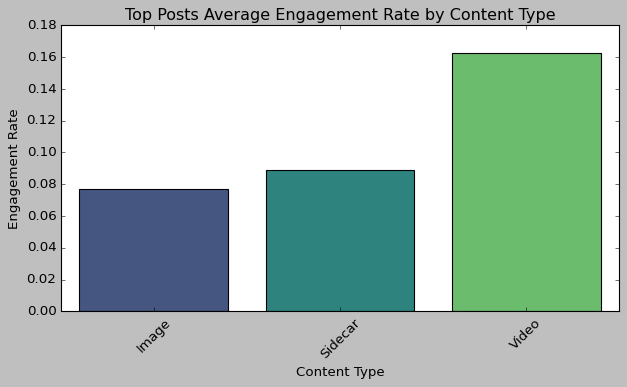

In [542]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_er_by_type_top.index, y=avg_er_by_type_top.values, palette="viridis")
plt.title('Top Posts Average Engagement Rate by Content Type')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Averages

The average metrics are also calculated so we can have more comparisons in the data.
[Ryahen,2019; Sun et al. 2022; De Oliveira, 2020]

In [543]:
avg_likes = df_era['likesCount'].mean()

print("The average likes count is: ", avg_likes)

The average likes count is:  1645.4193811074917


In [544]:
avg_comments= df_era['commentsCount'].mean()

print("The average comments count is: ", avg_comments)


The average comments count is:  41.14128664495114


In [545]:
avg_followers = df_era['user_followersCount'].mean()

print("The average followers count is: ", avg_followers)


The average followers count is:  39035.42548859935


In [546]:
avg_likes_top = top_df['likesCount'].mean()

print("The average likes count of top posts is: ", avg_likes_top)

The average likes count of top posts is:  5944.446058091286


In [547]:
avg_comments_top = top_df['commentsCount'].mean()

print("The average comments count of top posts is: ", avg_comments_top)

The average comments count of top posts is:  64.92116182572614


In [548]:
avg_followers_top = top_df['user_followersCount'].mean()

print("The average followers count of top posts is: ", avg_followers_top )

The average followers count of top posts is:  30522.908713692945


In [549]:
avg_er = df_era['log_engagement_rate'].mean()

print("The average engagement rate is: ", avg_er)

The average engagement rate is:  0.04082349678469336


In [550]:
avg_er_top = top_df['log_engagement_rate'].mean()

print("The average engagement rate of top posts is: ", avg_er_top)

The average engagement rate of top posts is:  0.11975611354845733


In [551]:
avgs_by_type = df_era.groupby('type')[['likesCount', 'commentsCount', 'user_followersCount','log_engagement_rate']].mean()

avgs_by_type

,likesCount,commentsCount,user_followersCount,log_engagement_rate
type,,,,
Image,533.138211,35.463415,27007.739837,0.027005
Sidecar,967.349568,45.041634,31872.344855,0.037700
Video,2588.809434,37.116038,49033.545283,0.046178


In [552]:
avgs_by_type_top = top_df.groupby('type')[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].mean()

avgs_by_type_top

,likesCount,commentsCount,user_followersCount,log_engagement_rate
type,,,,
Image,628.529412,80.294118,12599.470588,0.076976
Sidecar,2324.237548,57.386973,27135.172414,0.089034
Video,11019.176471,73.279412,36350.838235,0.162627


### Data Visualisation

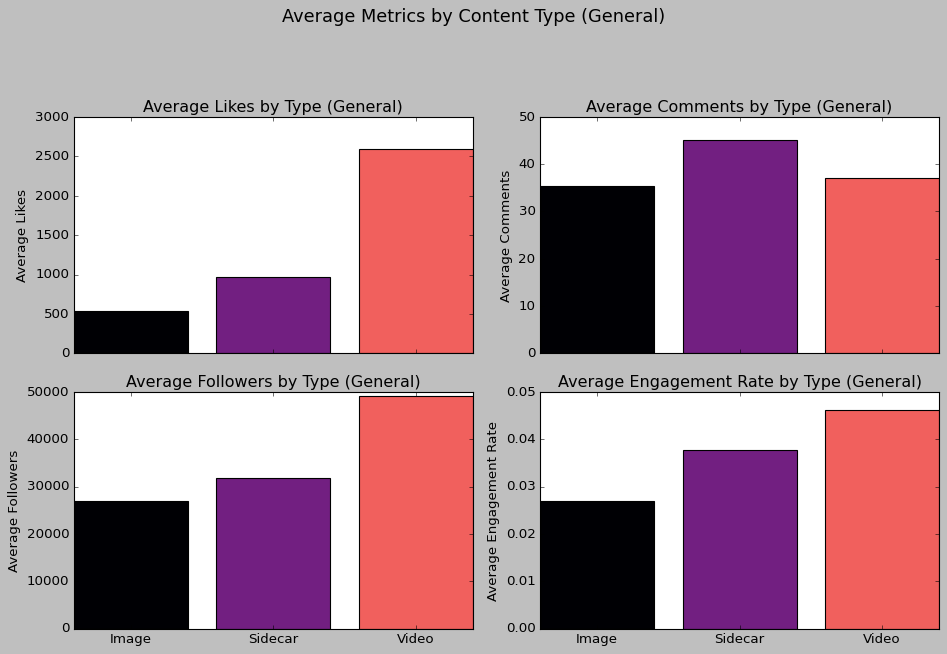

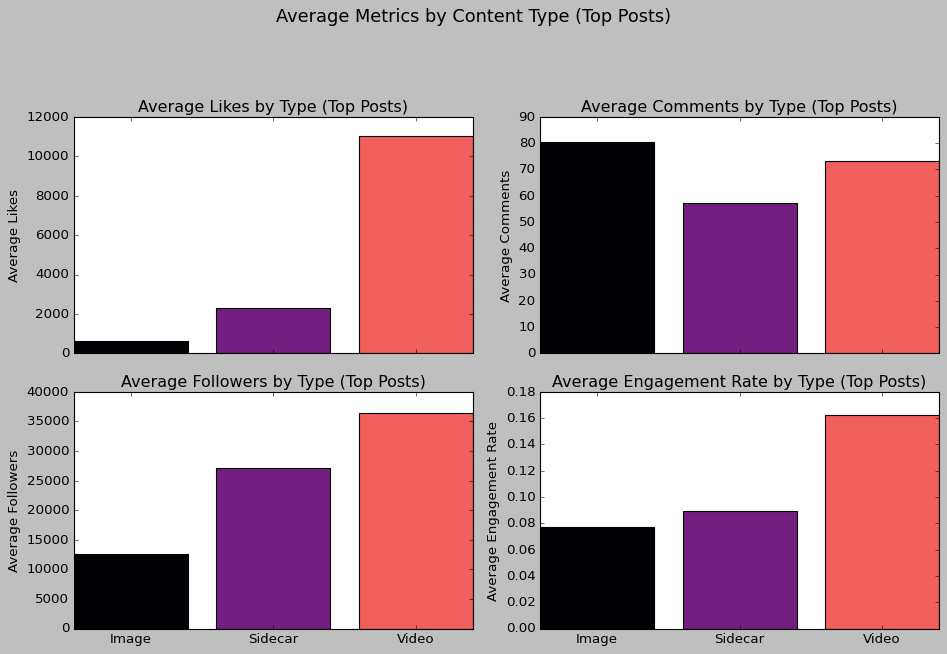

In [553]:
metrics = ['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']
metric_labels = ['Likes', 'Comments', 'Followers', 'Engagement Rate']

# Get unique content types
content_types = df_era['type'].unique()
num_types = len(content_types)

# Colours
cmap = plt.get_cmap('magma')
colors = [cmap(i / num_types) for i in range(num_types)]

# Figure 1: General Average by Metric
fig_general, axes_general = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes_general = axes_general.flatten()

for i, metric in enumerate(metrics):
    ax = axes_general[i]
    avg_metric_by_type = df_era.groupby('type')[metric].mean()
    ax.bar(avg_metric_by_type.index, avg_metric_by_type.values, color=colors)
    ax.set_ylabel(f'Average {metric_labels[i]}')
    ax.set_title(f'Average {metric_labels[i]} by Type (General)')

fig_general.suptitle('Average Metrics by Content Type (General)', fontsize=16, y=1.02)
fig_general.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Figure 2: Top Posts Average by Metric 
fig_top, axes_top = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes_top = axes_top.flatten()

for i, metric in enumerate(metrics):
    ax = axes_top[i]
    avg_metric_by_type_top = top_df.groupby('type')[metric].mean()
    ax.bar(avg_metric_by_type_top.index, avg_metric_by_type_top.values, color=colors)
    ax.set_ylabel(f'Average {metric_labels[i]}')
    ax.set_title(f'Average {metric_labels[i]} by Type (Top Posts)')
fig_top.suptitle('Average Metrics by Content Type (Top Posts)', fontsize=16, y=1.02)
fig_top.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


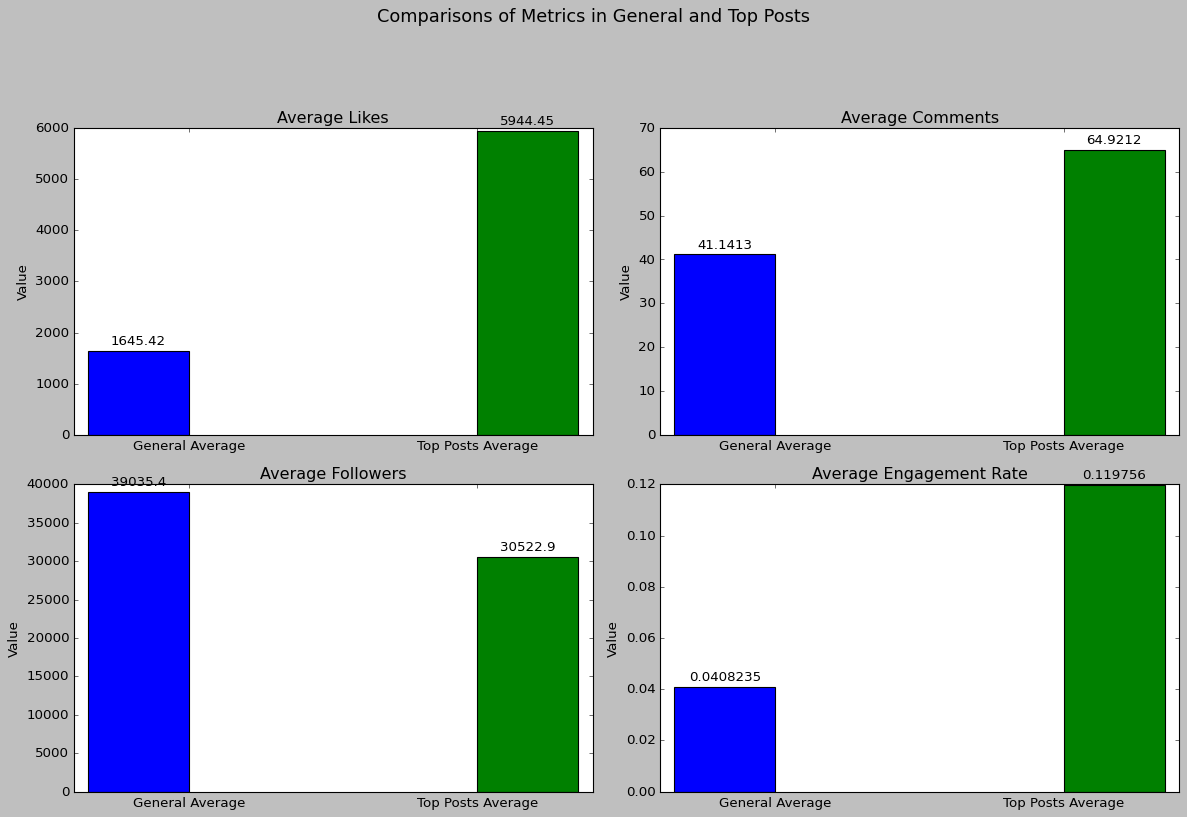

In [554]:
# Compare General and Top results

metrics = ['Likes', 'Comments', 'Followers', 'Engagement Rate']
avg_data = [avg_likes, avg_comments, avg_followers, avg_er]
avg_data_top = [avg_likes_top, avg_comments_top, avg_followers_top, avg_er_top]
labels = ['General Average', 'Top Posts Average']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  

for i, metric in enumerate(metrics):
    ax = axes[i]
    x = np.arange(2)
    width = 0.35

    rects1 = ax.bar(x[0] - width/2, avg_data[i], width, label=labels[0])
    rects2 = ax.bar(x[1] + width/2, avg_data_top[i], width, label=labels[1])

    ax.set_ylabel('Value')
    ax.set_title(f'Average {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

fig.suptitle('Comparisons of Metrics in General and Top Posts', fontsize=16, y=1.02)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Thematic Content Analysis

note: df['caption'] includes the hashtags as well

In [555]:
#Analyzing Text Content - caption

text = " ".join(str(i) for i in top_df.caption)

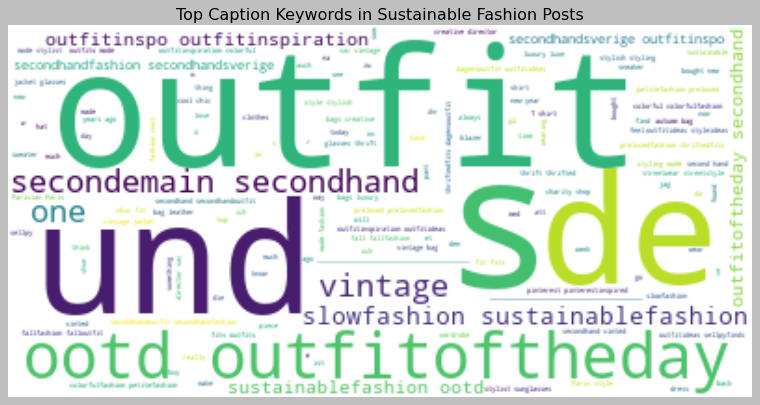

In [556]:
# Visualise top caption keywords using WordCloud

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Caption Keywords in Sustainable Fashion Posts")
plt.axis("off")
plt.show()

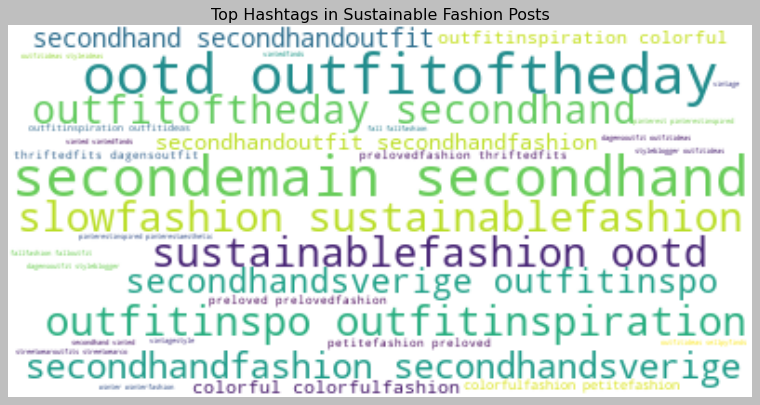

In [557]:
# Visualise top hashtags using WordCloud

hashtags = " ".join(str(i) for i in top_df.hashtags)

#Analyzing Text Content - caption
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(hashtags)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Hashtags in Sustainable Fashion Posts")
plt.axis("off")
plt.show()

In [558]:
# Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(top_df['caption'])

# Top keywords by TF-IDF average
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = tfidf_df.mean().sort_values(ascending=False).head(10)
top_keywords

vintage               0.090905
secondhand            0.078255
vinted                0.075152
outfit                0.071030
secondemain           0.063630
outfitinspiration     0.061567
outfitideas           0.059773
fashion               0.048416
new                   0.045779
sustainablefashion    0.044612
dtype: float64

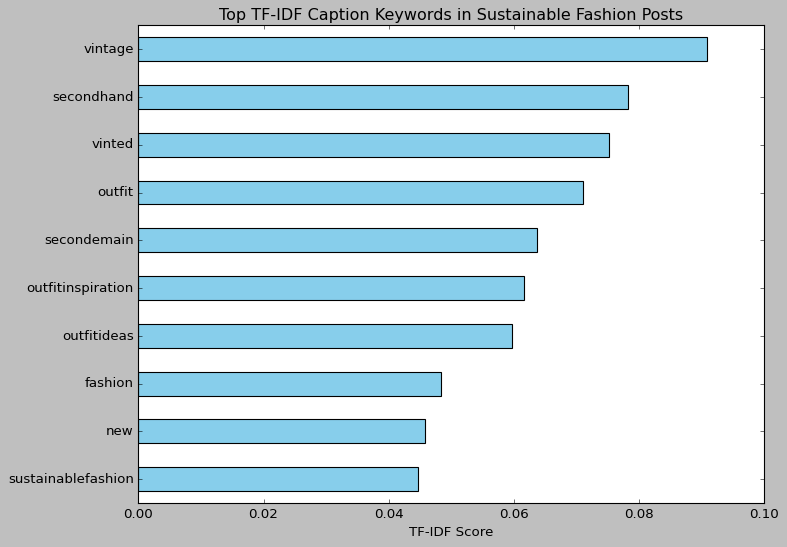

In [559]:
top_keywords.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top TF-IDF Caption Keywords in Sustainable Fashion Posts")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()

In [560]:
# TF-IDF for Hashtags
# Vectorize
X_hashtags = vectorizer.fit_transform(df['hashtags'])

# Top keywords by TF-IDF average
tfidf_df = pd.DataFrame(X_hashtags.toarray(), columns=vectorizer.get_feature_names_out())
top_hashtags = tfidf_df.mean().sort_values(ascending=False).head(10)
top_hashtags

sustainablefashion    0.083322
slowfashion           0.066963
secondhandfashion     0.058425
secondhand            0.047262
vintage               0.043850
secondhandfirst       0.040886
ootd                  0.039739
outfitinspiration     0.037376
prelovedfashion       0.036837
outfitoftheday        0.033152
dtype: float64

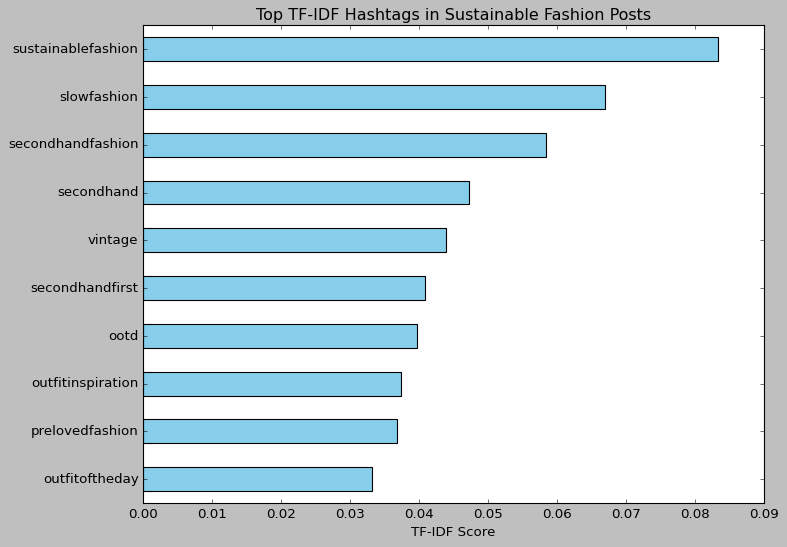

In [561]:
top_hashtags.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top TF-IDF Hashtags in Sustainable Fashion Posts")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()

Recommendation: implement NLP for deeper thematic analysis and group posts by themes

## Correlation Analysis

In [562]:
# # Correlation analysis on each engagment metrics
# cm_era = df_era[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].corr()
# print(cm_era)

In [563]:
# # Correlation analysis on each engagment metrics (Top)
# cm_era_top = top_df[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].corr()
# print(cm_era_top)

In [564]:
# Correlation analysis on other post factors
cm_era_var = df_era[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio', 'log_engagement_rate']].corr()
print(cm_era_var)

                     hashtagsCount  captionWordCount  isSponsored_encoded  \
hashtagsCount             1.000000          0.164731            -0.123460   
captionWordCount          0.164731          1.000000             0.100633   
isSponsored_encoded      -0.123460          0.100633             1.000000   
type_encoded             -0.030591         -0.179045             0.016628   
has_music                -0.040550         -0.189673             0.013272   
original_audio           -0.046606         -0.071776             0.003837   
log_engagement_rate       0.010820         -0.030914            -0.054270   

                     type_encoded  has_music  original_audio  \
hashtagsCount           -0.030591  -0.040550       -0.046606   
captionWordCount        -0.179045  -0.189673       -0.071776   
isSponsored_encoded      0.016628   0.013272        0.003837   
type_encoded             1.000000   0.885587        0.337953   
has_music                0.885587   1.000000        0.381615   

In [565]:
cm_era_var_top = top_df[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio', 'log_engagement_rate']].corr()
print(cm_era_var_top)

                     hashtagsCount  captionWordCount  isSponsored_encoded  \
hashtagsCount             1.000000          0.161217            -0.051090   
captionWordCount          0.161217          1.000000            -0.015156   
isSponsored_encoded      -0.051090         -0.015156             1.000000   
type_encoded              0.034713         -0.273696            -0.007791   
has_music                 0.057680         -0.233978            -0.010182   
original_audio           -0.005710         -0.066488            -0.024130   
log_engagement_rate       0.035476         -0.043864            -0.018793   

                     type_encoded  has_music  original_audio  \
hashtagsCount            0.034713   0.057680       -0.005710   
captionWordCount        -0.273696  -0.233978       -0.066488   
isSponsored_encoded     -0.007791  -0.010182       -0.024130   
type_encoded             1.000000   0.893467        0.336264   
has_music                0.893467   1.000000        0.376359   

Unlike the Maltese dataset isSponsored is filled, which means it can be utilised for this analysis.

### Data Visualisation

In [566]:
# sns.heatmap(cm_era, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()

In [567]:
# sns.heatmap(cm_era_top, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix of Top Posts")
# plt.show()

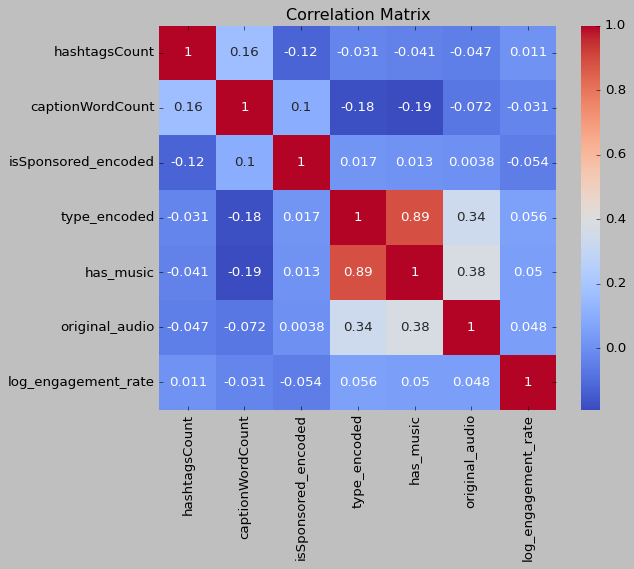

In [568]:
sns.heatmap(cm_era_var, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

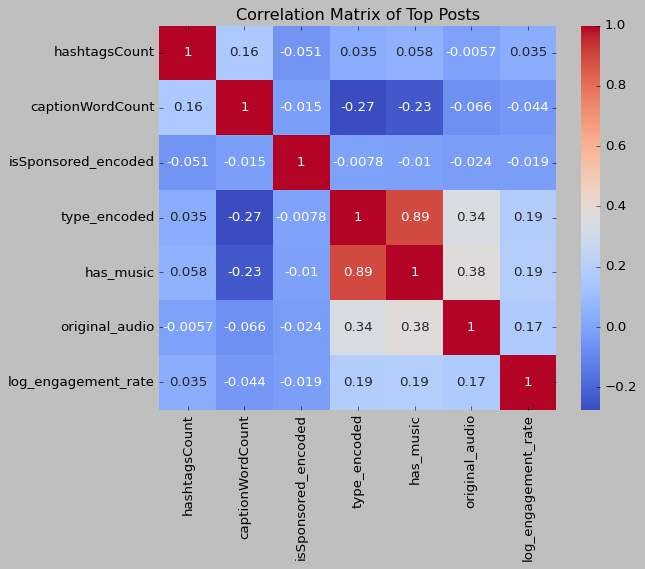

In [569]:
sns.heatmap(cm_era_var_top, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Top Posts")
plt.show()

## Regression Analysis

In [570]:
# OLS Regression Results

X = top_df[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio',]]
y = top_df['log_engagement_rate']
X = sm.add_constant(X) # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_engagement_rate   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.039
Method:                  Least Squares   F-statistic:                     4.232
Date:                 Tue, 20 May 2025   Prob (F-statistic):           0.000366
Time:                         19:53:30   Log-Likelihood:                 131.20
No. Observations:                  482   AIC:                            -248.4
Df Residuals:                      475   BIC:                            -219.1
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

The model yielded a very low R-squared value of 0.051 and Adjusted R-squared of 0.039 This means 3.9% of the variation in engagement rate was explained. This suggests that many other factors likely influence the effectiveness of UGC and the engagemennt rate. Following the Terms-Of-Service (TOS) of Instagram and ensuring ethical data scraping, the data collected was limited. Key Performance Indicators (KPIs) such as shares and saves were absent which are also significant indicators. The overall model is statistically significant at F-statistic p = 0.000366 .

Only one value emerged as a significant predictor, following the rule p < 0.05:
Original audio received higher engagement and resulted to the coefficient of 0.0787 and p value of 0.017.
Unlike the Maltese results captionWordCount and type were not significant, as well as the other variables (hashtagsCount, isSponsored, has_music).

Despite the log transformation the data indicated non-normality of residuals, which could have an affect on the accuracy.

### RQ2: How effective is current UGC in Sustainable Fashion?
- Overall the average engagement rate is 4%, and 11.98% for the top posts.

### RQ3: Which guidelines should be followed to create effective UGC?
- It is encouraged to use original audio which resulted with higher engagement.

### Malta vs Europe

- Malta had a stronger fit at R-square value of 0.400, while the European only had the value of 0.051. 
- In Malta longer captions and video forat were significanntly related to higher engagement, but in Europe original audio was the onnly significant predictor.
- This could suggest that Maltese creators rely more on inforative captions and storytelling and video formats. In Europe, the use of original audio is more effective. A limit of this study is that the content of the post is only analysed from the caption, and not the actual content of the media whether it is a photo or video. The use of original audio could mean that the informational storytelling could be shared through the recording instead of the caption.
